# QUESTION 1
Linear Annealed Policy 
>> Applied on Epsilon Bandit Problem

In [ ]:
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt

In [ ]:
#Intialization of class parameters 
lt_u = np.array([1,2,3,4])
lt_std = np.array([1,2,3,4])
n_arms = len(lt_u)


In [ ]:
#Parameters sfor this method are pulls,epsilon,decrement rate and stop_value 
n_pulls = 500
epsilon=0.95
decrement_rate=None

stop_value=None

def estimate_reward(n_pulls,epsilon,decrement_rate=None,stop_value=None):
  global n_arms,lt_u,lt_std
  lt_reward=np.zeros(shape=(n_arms))
  lt_pulls=np.zeros(shape=(n_arms))

  total_reward=0

  for pull in range(n_pulls):
    bandit_chosen=None
    current_probability=npr.random()

    #Select the arm
    if current_probability<epsilon:
      #Explore
      temp_arm=npr.choice(range(n_arms))
    else:
      temp_arm=np.argmax(lt_reward)

    #Sidebar activity of decreasing epsilon for next pull
    if decrement_rate:
      if not stop_value:
        #Assign kr agr stop value assigned nahi hai toh
        stop_value=0.01
      if epsilon>(stop_value+decrement_rate):
        epsilon-=decrement_rate

    #Estimate reward
    pull_reward=npr.normal(
        loc=lt_u[temp_arm],scale=lt_std[temp_arm]
                          )

    #Update the state variables
    old_average_reward=lt_reward[temp_arm]
    new_average_reward=((lt_pulls[temp_arm]*old_average_reward)+pull_reward)/(lt_pulls[temp_arm]+1)

    lt_reward[temp_arm]=new_average_reward
    lt_pulls[temp_arm]+=1

    #Cache your reward
    total_reward+=pull_reward

  return total_reward

In [ ]:
estimate_reward(n_pulls=500,
                epsilon=0.95,
                decrement_rate=0.05,
                stop_value=0.05)

1822.169315887552

In [ ]:
#Can be ABC abstract class that takes a function that can always be simulated

# def simulate_results(n_sims,verbose=True):
verbose=True
n_sims=5000
from collections import defaultdict

avg_reward=0

if verbose:
  dict_store=defaultdict(float)

for sim in range(n_sims):
  temp_reward=estimate_reward(n_pulls=500,
                epsilon=0.95,
                decrement_rate=0.05,
                stop_value=0.05)
  reward_tillSim=avg_reward*(max(sim,0))
  rewardSum=reward_tillSim+temp_reward

  avg_reward=rewardSum/(sim+1)

  if verbose:
    dict_store[sim]=temp_reward




1802.3644216988034

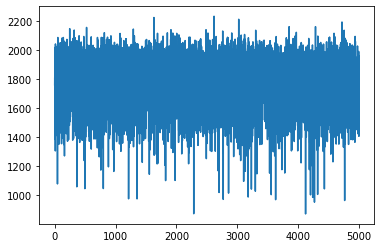

In [ ]:
plt.plot(list(dict_store.values()))
avg_reward

In [ ]:
dict_strategies={'A': {'n_pulls': 500,
                      'epsilon':1,
                      'decrement_rate':(0.5/100),
                      'stop_value':0.25
                      },
                 'B': {'n_pulls': 500,
                      'epsilon':0.5,
                      'decrement_rate':(1/100),
                      'stop_value':0.05
                      },
                 'C': {'n_pulls': 500,
                      'epsilon':0.9,
                      'decrement_rate':(0.5/100),
                      'stop_value':0.1
                      },
                 'D': {'n_pulls': 500,
                      'epsilon':0.75,
                      'decrement_rate':(1/100),
                      'stop_value':0.15
                      },
                 'E': {'n_pulls': 500,
                      'epsilon':0.15,
                      'decrement_rate':None,
                      'stop_value':None
                      }
                }
dict_strategies.keys()

dict_keys(['A', 'B', 'C', 'D', 'E'])

In [ ]:
verbose=True
n_sims=5000
from collections import defaultdict

def simulate_activity(n_sims,dict_specifications,verbose=False):

  avg_reward=0
  if verbose:
    dict_store=defaultdict(float)

  for sim in range(n_sims):
    temp_reward=estimate_reward(
        *list(dict_specifications.values())
    )
    reward_tillSim=avg_reward*(max(sim,0))
    rewardSum=reward_tillSim+temp_reward

    avg_reward=rewardSum/(sim+1)

    if verbose:
      dict_store[sim]=temp_reward
  if verbose:
    return(avg_reward,dict_store)
  return avg_reward
# simulate_activity(5,dict_strategies['A'])

In [ ]:
for k,val in dict_strategies.items():
  strategy_simulated_award=simulate_activity(5000,
                                             val
                                             )
  
  dict_strategies[k]['strategy_simulated_award']=strategy_simulated_award
  print(k,strategy_simulated_award,sep='-->')


A-->1697.6769464243516
B-->1799.6646176518805
C-->1782.5031650796204
D-->1786.671183317738
E-->1750.6939705320117


In [ ]:
# for k,val in dict_strategies.items():
#   strategy_simulated_award=simulate_activity(5000,
#                                              val
#                                              )
  
#   dict_strategies[k]['strategy_simulated_award']=strategy_simulated_award
#   print(k,strategy_simulated_award,sep='-->')


In [ ]:
for k,val in dict_strategies.items():
  strategy_simulated_award,strategy_dict_scores=simulate_activity(5000,
                                             val,verbose=True
                                             )
  
  dict_strategies[k]['strategy_simulated_award']=strategy_simulated_award
  dict_strategies[k]['strategy_dict_scores']=strategy_dict_scores
  print(k,strategy_simulated_award,sep='-->')


TypeError: ignored

In [ ]:
# f,ax
import pandas as pd
pd.concat([pd.Series(dict_strategies[k]['strategy_dict_scores']) for k in dict_strategies.keys()],
          axis=1).boxplot(figsize=(20,8))

## Rough WORK

In [ ]:
lt_ch=[npr.choice(range(n_arms)) for _ in range(1000)]
plt.hist(lt_ch)

In [ ]:
# lt_reward
# estimate_reward(
#     *list(dict_strategies['A'].values())
#             )

In [ ]:
plt.boxplot(list(dict_strategies[k]['strategy_dict_scores'].values()))

## Reference

In [ ]:
# https://docs.python.org/3/library/abc.html

# Question 2


In [ ]:
import numpy as np

from scipy.optimize import minimize
from scipy.interpolate import CubicSpline

In [ ]:
price = 1 
M=100 
delta = 0.9 
T=15 

sValues = np.arange(M+1) 
tValues = np.arange(T+1)

sN=len(sValues) # how many s and t values are there?
tN=len(tValues)


In [ ]:
V=np.zeros((sN,tN)) 
U=np.zeros((sN,tN))

In [ ]:


for ti in reversed(range(tN-1)):
  spline_interpolator=CubicSpline(x=np.arange(M+1),
                                  y=V[:,ti+1])
  print(spline_interpolator(1.5))
  for si in range(sN): 
    t=tValues[ti] 
    ore_state=sValues[si] 
    def objective(x):    
      return -1*(price*x - (x**2)/(1+ore_state) + delta*spline_interpolator(ore_state-x))

    opt=minimize(objective,ore_state/2,
          bounds=[(0,ore_state)]) 

    V[si,ti] = -1*opt.fun[0]
    U[si,ti] = opt.x[0]


0.0
0.6364382938682638
0.8974556373457556
0.9906464258510354
1.0277772158892735
1.0427039675427703
1.0482761602546669
1.0499781616887056
1.0502152475928916
1.0500035788788935
1.049731164053017
1.049516743940758
1.049375825692236
1.0492924748360055
1.0492468349711426


In [ ]:
s=M # at the initial time there are 100 tons of ore
for t in range(T):
    si=s
    print("Year: ", t , ", Init Ore: ",s, ", Mine: ", U[si,t],sep='')
    s=int(s-U[si,t]) # remove this amount from the mine


Year: 0, Init Ore: 100, Mine: 24.30773764397713
Year: 1, Init Ore: 75, Mine: 18.304956878770227
Year: 2, Init Ore: 56, Mine: 13.743477658003783
Year: 3, Init Ore: 42, Mine: 10.384399708527658
Year: 4, Init Ore: 31, Mine: 7.744190567901369
Year: 5, Init Ore: 23, Mine: 5.826333529362794
Year: 6, Init Ore: 17, Mine: 4.389416847908784
Year: 7, Init Ore: 12, Mine: 3.184656457422294
Year: 8, Init Ore: 8, Mine: 2.209737698369163
Year: 9, Init Ore: 5, Mine: 1.4643975984514257
Year: 10, Init Ore: 3, Mine: 0.9570863335748457
Year: 11, Init Ore: 2, Mine: 0.7093138807080316
Year: 12, Init Ore: 1, Mine: 0.43517411995252464
Year: 13, Init Ore: 0, Mine: 0.0
Year: 14, Init Ore: 0, Mine: 0.0


In [ ]:
V[M,0]-58.113941952344646

0.043821225242872686

# Rough WORK

In [ ]:
spline_interpolator=CubicSpline([1,2,3],[10,20,30])
spline_interpolator(1.5)

array(15.)

In [ ]:
np.arange(t)*t
spline_iterpolator=CubicSpline(np.arange(t),np.arange(t)+t)
spline_iterpolator(1.5)

array(10.5)

In [ ]:
ore_state=1
time_state=10#This will detremine the interpolator that we intend to use 

def objective(x):    
  return -1*(price*x - (x**2)/(1+ore_state) + delta*spline_iterpolator(ore_state-x))

lt_cache=[]

for t in range(2,time_state):
  spline_iterpolator=CubicSpline(np.arange(t),np.arange(t)+t)
  print(spline_iterpolator(1.5))

  
  opt=minimize(objective,ore_state/2,
          bounds=[(0,ore_state)]) 
  lt_cache.append(opt.x[0])



3.5
4.5
5.5
6.5
7.5
8.5
9.5
10.5


In [ ]:
lt_cache

[0.10000001131277259,
 0.10000001131277259,
 0.10000005572169357,
 0.10000005572169357,
 0.09999987808600963,
 0.0999999669038516,
 0.0999999669038516,
 0.0999999669038516]

In [ ]:
-1*opt.fun[0]

9.005

# Question 3

In [ ]:
import numpy as np
import gym
import time
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!python -m atari_py.import_roms /content/drive/MyDrive/ReinforcementLearning/Roms

copying adventure.bin from /content/drive/MyDrive/ReinforcementLearning/Roms/HC ROMS/PAL VERSIONS OF NTSC ORIGINALS/Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying pacman.bin from /content/drive/MyDrive/ReinforcementLearning/Roms/HC ROMS/PAL VERSIONS OF NTSC ORIGINALS/Pac-Man (1982) (Atari, Tod Frye) (CX2646) (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/pacman.bin
copying keystone_kapers.bin from /content/drive/MyDrive/ReinforcementLearning/Roms/HC ROMS/PAL VERSIONS OF NTSC ORIGINALS/Keystone Kapers - Raueber und Gendarm (1983) (Activision, Garry Kitchen - Ariola) (EAX-025, EAX-025-04I - 711 025-725) (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/keystone_kapers.bin
copying king_kong.bin from /content/drive/MyDrive/ReinforcementLearning/Roms/HC ROMS/PAL VERSIONS OF NTSC ORIGINALS/King Kong (1982) (Tigervision - Software Electronic

In [ ]:
env = gym.make("Pong-v0")
env.unwrapped.get_action_meanings() 

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [ ]:
raw_pixels = env.reset()
raw_pixels.shape

(210, 160, 3)

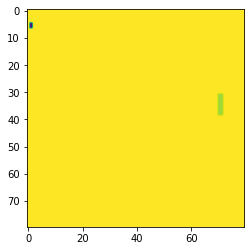

In [ ]:
def prepro(I):
  I = I[35:195,:,:].copy() 
  I = I[::2,::2,0].copy()
  # I[I == 144] = 0 
  # I[I == 109] = 0 
  # I[I != 0] = 1 
  return np.array(I.copy())
plt.imshow(prepro(raw_pixels))


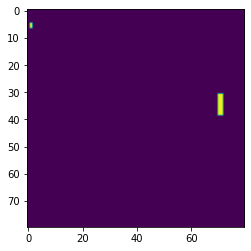

In [ ]:
def prepro(I):
  I = I[35:195,:,:].copy() 
  I = I[::2,::2,0].copy()
  I[I == 144] = 0 
  I[I == 109] = 0 
  I[I != 0] = 1 
  return np.array(I.copy())
plt.imshow(prepro(raw_pixels))

In [ ]:
def strategise_action(temp_pixel):
  yy,xx=np.where(temp_pixel==1)

  idx_ball=np.where((xx<70) & (xx>10))
  xx_ball=xx[idx_ball]
  yy_ball=yy[idx_ball]

  if len(idx_ball)==0:
    return 0
  
  score_ball=np.mean(yy_ball)

  idx_paddle=np.where(xx>=70)
  xx_paddle=xx[idx_paddle]
  yy_paddle=yy[idx_paddle]

  score_paddle=np.mean(yy_paddle)

  if score_ball>score_paddle:
    return 3
  elif score_ball<score_paddle:
    return 2
  else:
    return 0
# strategise_action(lt_pixels[20])

In [ ]:
def cache_reward(env):
  slow = True
  score = 0
  frame_history = []
  action_history = []
  reward_history = []
  done = False # done gets returned from the environment to tell you if this game (first to 21 points) is over
  raw_pixels = env.reset()
  raw_pixels, reward, done, info = env.step(1)
  pixels = prepro(raw_pixels)
  while not done:
      # action = np.random.choice([0,2,3]) # we'll eventually pick the action from a NN
      action=strategise_action(pixels)
      raw_pixels, reward, done, info = env.step(action)# Done is stop criterion based here any[score of participant] of difference of score magnitude 
      frame_history.append(pixels)
      action_history.append(action) # these are the action and reward when you saw the last frame
      reward_history.append(reward)
      pixels = prepro(raw_pixels) # now this is the new frame
      score += reward
  return reward_history

# cache_reward(env)


def compute_reward_player(reward_history):
  reward_history=np.array(reward_history)
  return len(reward_history[reward_history>0])




In [ ]:
from collections import defaultdict
# dict_rewards=defaultdict(int)
lt_score=[]
for i in range(500):
  if i%10==0:
    print(i,end='-->')
  temp_rewards=cache_reward(env)
  temp_score=compute_reward_player(temp_rewards)
  lt_score.append(temp_score)

0-->

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10-->20-->30-->40-->50-->60-->70-->80-->90-->100-->110-->120-->130-->140-->150-->160-->170-->180-->190-->200-->210-->220-->230-->240-->250-->260-->270-->280-->290-->300-->310-->320-->330-->340-->350-->360-->370-->380-->390-->400-->410-->420-->430-->440-->450-->460-->470-->480-->490-->

7.894


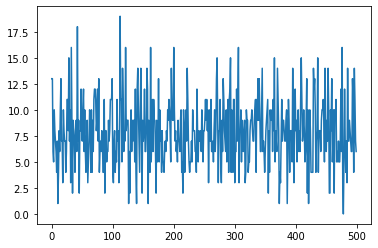

In [ ]:
lt_score
print(np.mean(lt_score))
plt.plot(lt_score)


In [ ]:
reward_history=np.array(reward_history)
len(reward_history[reward_history>0])

NameError: ignored

## ROUGH WORK

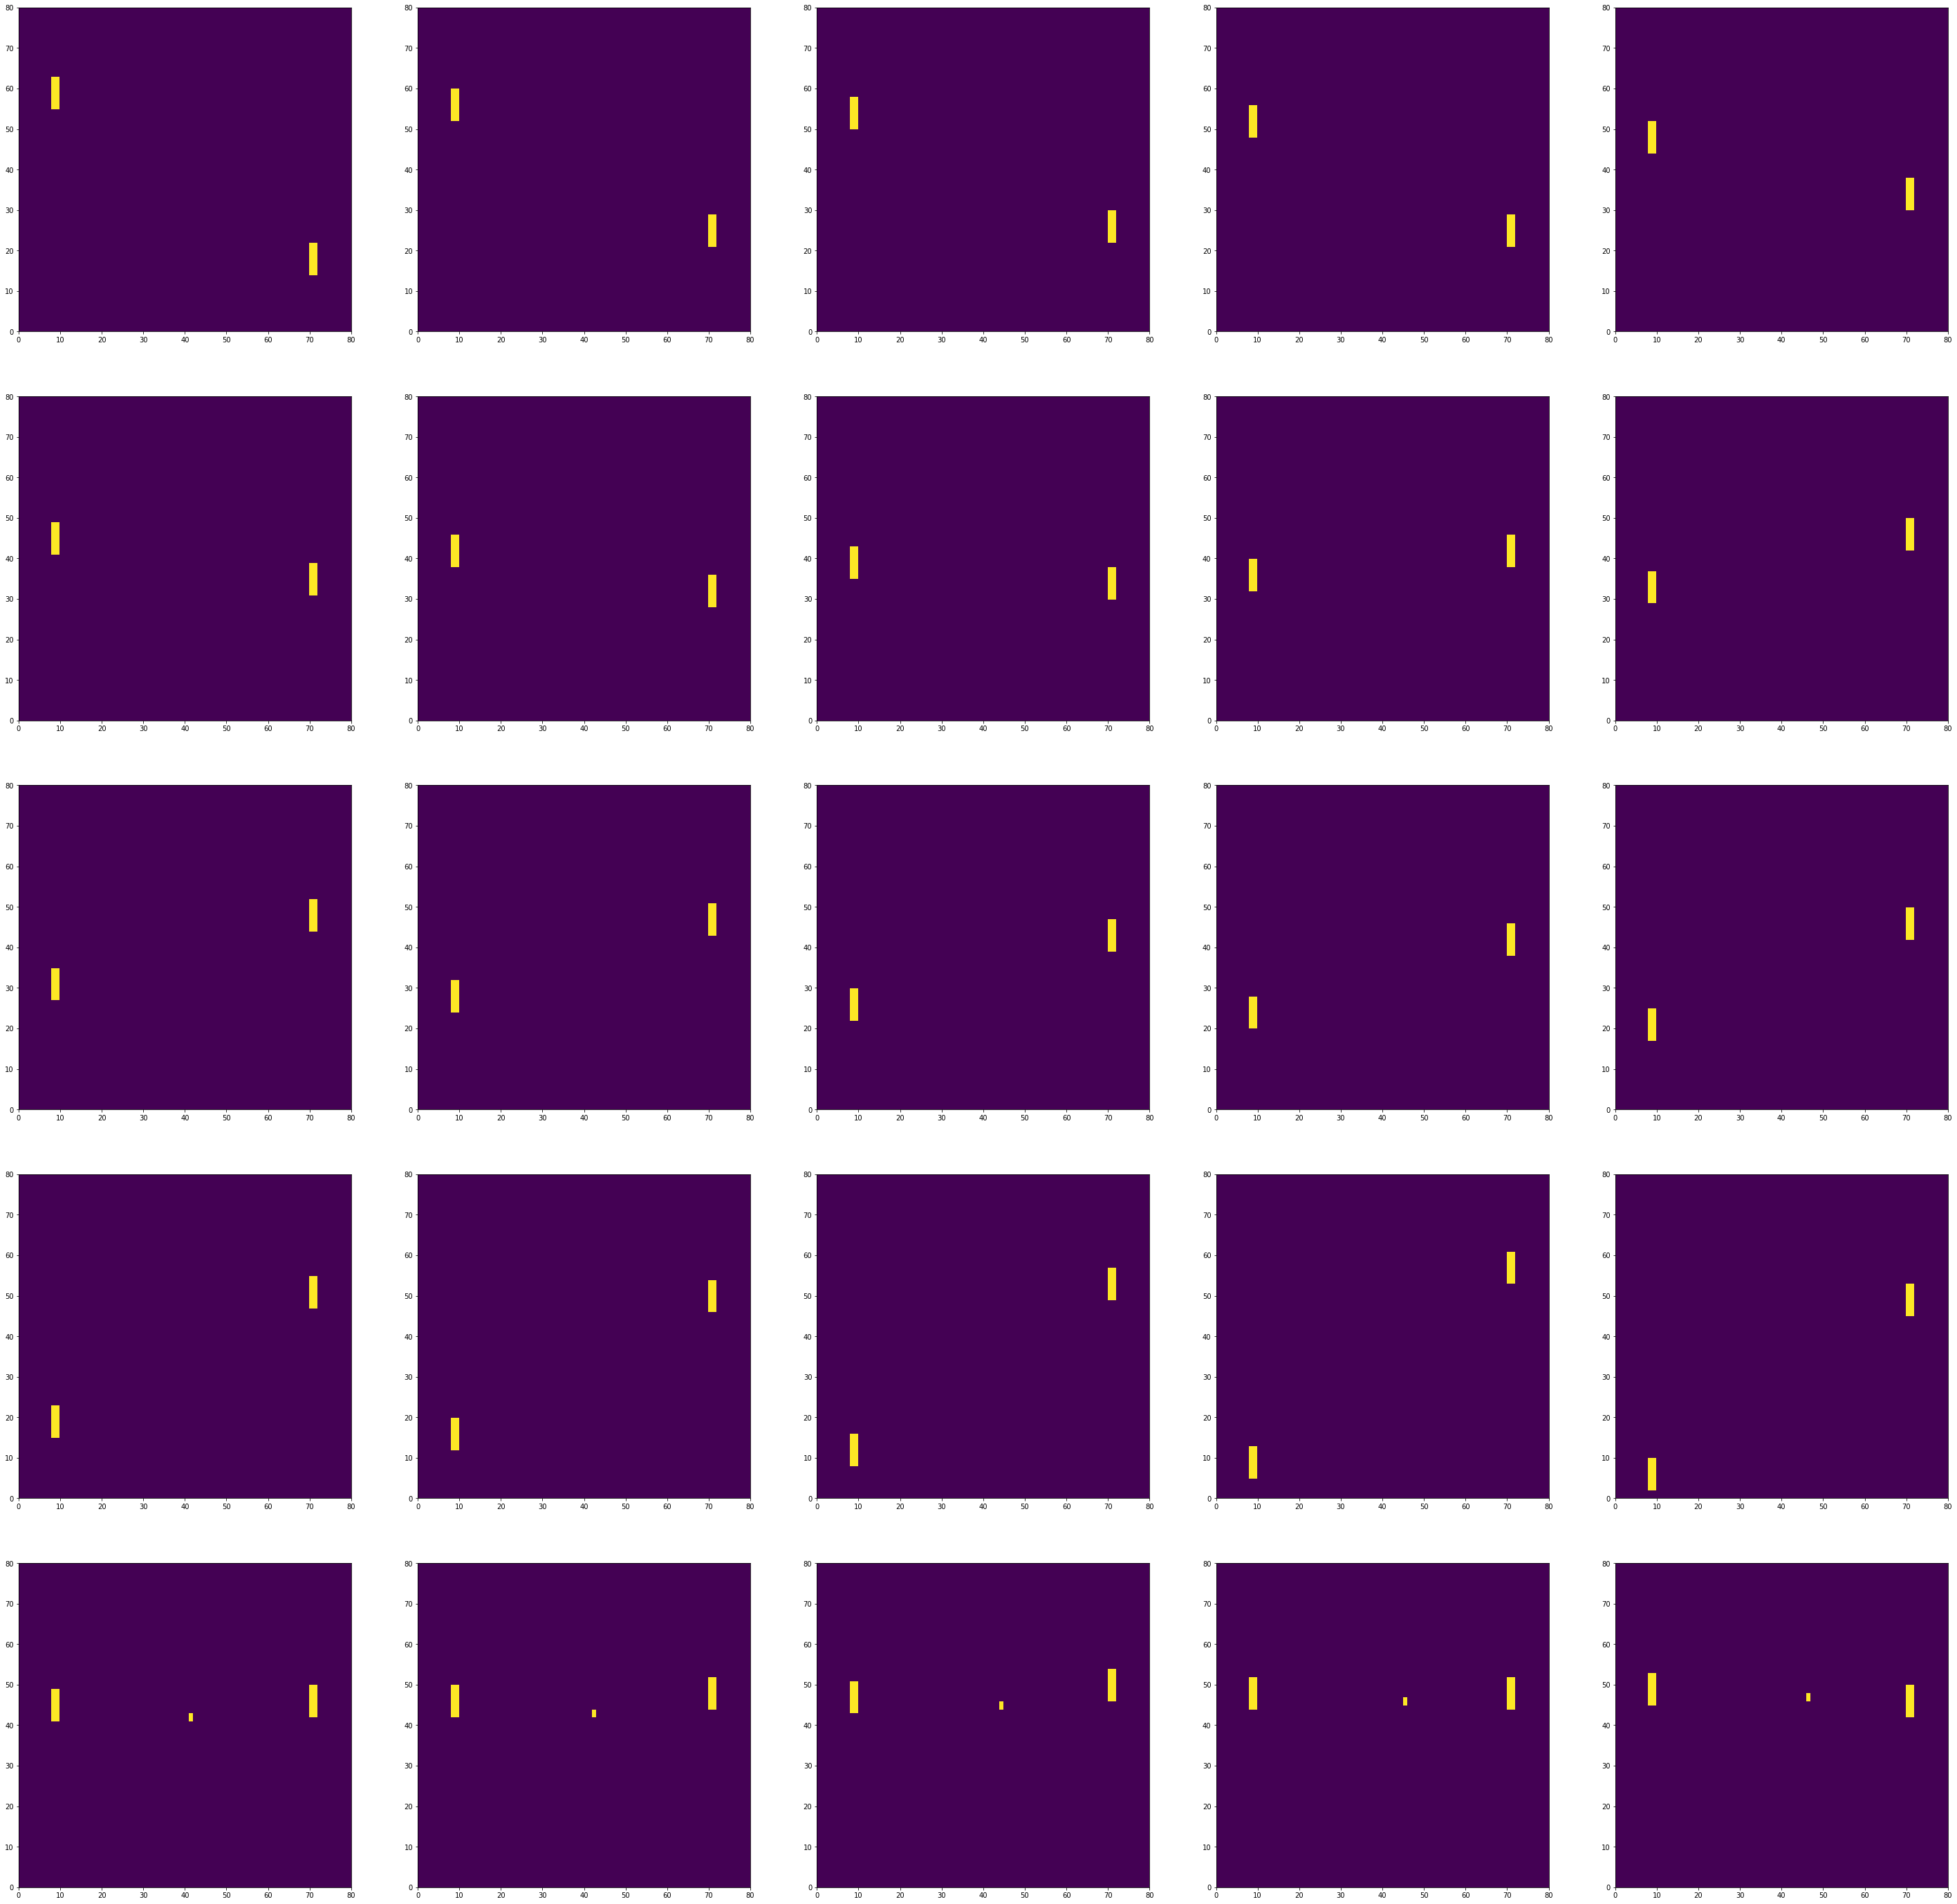

In [ ]:
# it takes roughly 20 frames at the beginning of a game, or after a point is scored for play to resume...
# you should probably be careful about this...

nf = 0
done = False
score = 0
raw_pixels = env.reset()
plt.figure(figsize=(50, 50))
why = 1
nextf = 0

lt_pixels=[]
while not done:
    nf += 1
    action = np.random.choice([0,2,3]) 
    # action=3#UP 2#DN
    raw_pixels, reward, done, info = env.step(action)
    pixels = prepro(raw_pixels)
    
    score += reward
    
    if reward != 0:
      #This is performed becaus ethe screen/game is in off mode for intial few frames
      #So the code waits till the first reward/point is scored
        nextf = 1
    
    if (nextf == 1) & (why<26):
        plt.subplot(5,5,why )
        lt_pixels.append(pixels)
        plt.pcolor(pixels);
        why += 1
        
    

In [ ]:
len(lt_pixels)

25

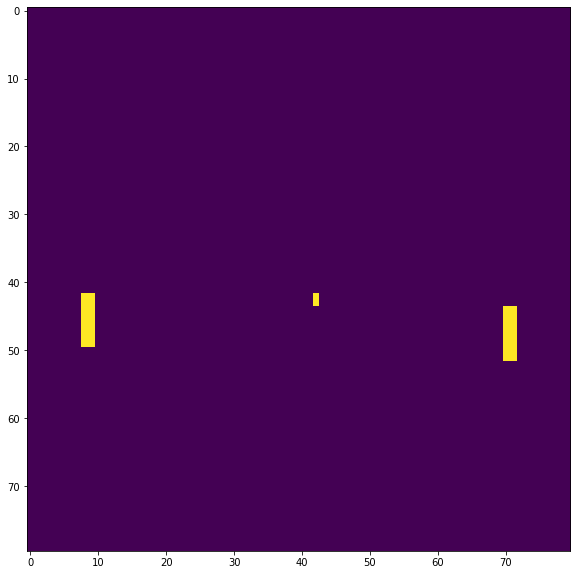

In [ ]:
temp_pixel=lt_pixels[21]
plt.figure(figsize=(30,10))
plt.imshow(temp_pixel)#Right one is our paddle #Lets deteremine the location of two paddles

In [ ]:
yy,xx=np.where(temp_pixel==1)

idx_ball=np.where((xx<70) & (xx>10))
xx_ball=xx[idx_ball]
yy_ball=yy[idx_ball]

# score_ball=np.mean(temp_pixel[yy_ball,xx_ball])
score_ball=np.mean(yy_ball)


idx_paddle=np.where(xx>=70)
xx_paddle=xx[idx_paddle]
yy_paddle=yy[idx_paddle]

# score_paddle=np.mean(temp_pixel[yy_paddle,xx_paddle])
score_paddle=np.mean(yy_paddle)




score_ball,score_paddle

(42.5, 47.5)